In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from scipy import interpolate
import numpy as np

In [2]:
root_dir = './'
local_path_soil = '/bd_mir_solo_without_xy.csv'
file_path_soil = root_dir + local_path_soil

df_soil = pd.read_csv(file_path_soil)

In [3]:
df_soil.shape[0]

540

## Load train data

In [4]:
df_soil_neossolo = df_soil.where(df_soil['Ordem.SIBCS'] =='Neossolo').dropna(axis = 0)

In [5]:
df_soil_neossolo_data = df_soil_neossolo.drop(['ID_Unico','Ordem.SIBCS','Carbon_gkg'], axis=1)
df_soil_neossolo_target = pd.DataFrame(df_soil_neossolo, columns=['Carbon_gkg'])

## Load test data

In [6]:
df_soil_test = pd.read_csv('./bd_mir_solo_test_without_xy.csv')

In [7]:
df_soil_test_data = df_soil_test.drop(['ID','ID_Unico','Ordem.SIBCS','Carbon_gkg'], axis=1)
df_soil_test_target = pd.DataFrame(df_soil_test, columns=['Carbon_gkg'])

In [8]:
df_soil_test_neossolo = df_soil_test.where(df_soil_test['Ordem.SIBCS'] =='Neossolo').dropna(axis = 0)
df_soil_test_neossolo_data = df_soil_test_neossolo.drop(['ID','ID_Unico','Ordem.SIBCS','Carbon_gkg'], axis=1)
df_soil_test_neossolo_data = df_soil_test_neossolo_data.apply(lambda x:np.log(1/x))
df_soil_test_neossolo_target = pd.DataFrame(df_soil_test_neossolo, columns=['Carbon_gkg'])

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ('std_scaler',StandardScaler())
])

X = pipeline.fit_transform(df_soil_test_neossolo_data)
df_soil_test_neossolo_data_tr = pd.DataFrame(X,columns=df_soil_test_neossolo_data.columns)

## Preprocess

In [10]:
import matplotlib.pyplot as plt
from scipy import interpolate
import numpy as np

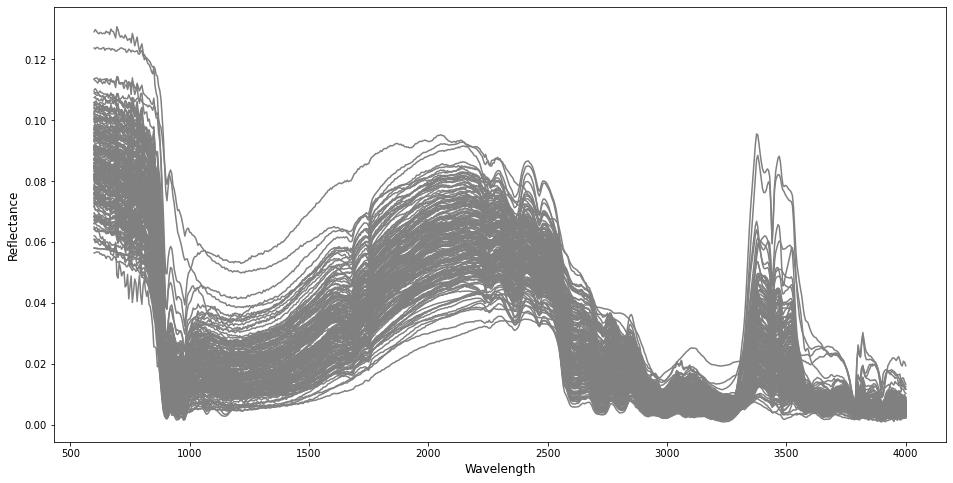

In [11]:
index_col = []
for i in range(600,4001,5):
    index_col.append(i)
plt.figure(figsize = (16, 8))
for i in range(len(df_soil_neossolo_data)):
    
    test_row = df_soil_neossolo_data.iloc[i]
    plt.plot(index_col, test_row, markersize = 0.01, color='grey') 
    
plt.xlabel('Wavelength', fontsize=12)
plt.ylabel('Reflectance', fontsize=12)
plt.show()

In [12]:
#Converting data from reflectance values to absorbance values
from math import log, exp

In [13]:
df_soil_neossolo_data = df_soil_neossolo_data.apply(lambda x:np.log(1/x))

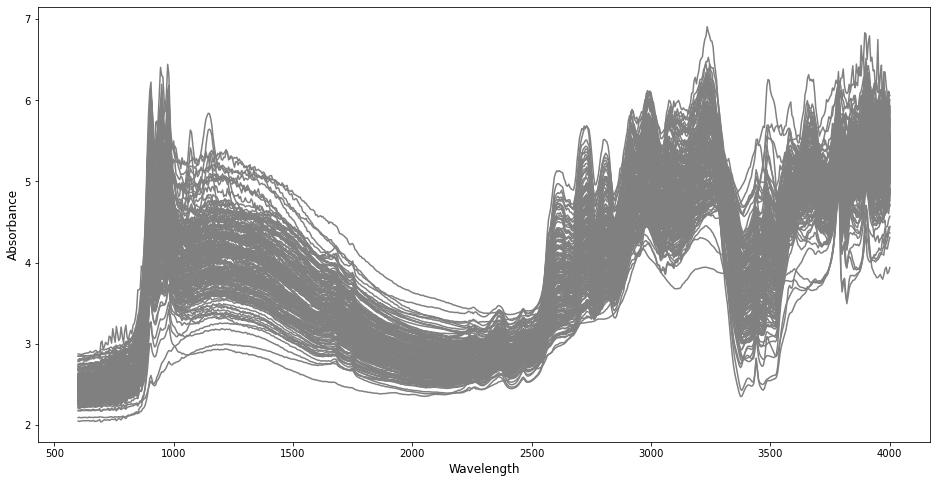

In [14]:
plt.figure(figsize = (16, 8))
for i in range(len(df_soil_neossolo_data)):
    
    test_row = df_soil_neossolo_data.iloc[i]
    plt.plot(index_col, test_row, markersize = 0.01, color='grey') 
    
plt.xlabel('Wavelength', fontsize=12)
plt.ylabel('Absorbance', fontsize=12)
plt.show()

In [15]:
#Savitzky-Golay Filtering
import scipy
from scipy import signal

In [16]:
v = scipy.signal.savgol_filter(df_soil_neossolo_data,21,3)
for i in range(len(df_soil_neossolo_data)):
    for j in range(len(df_soil_neossolo_data.iloc[i])):
        df_soil_neossolo_data.iloc[i][j] = v[i][j]

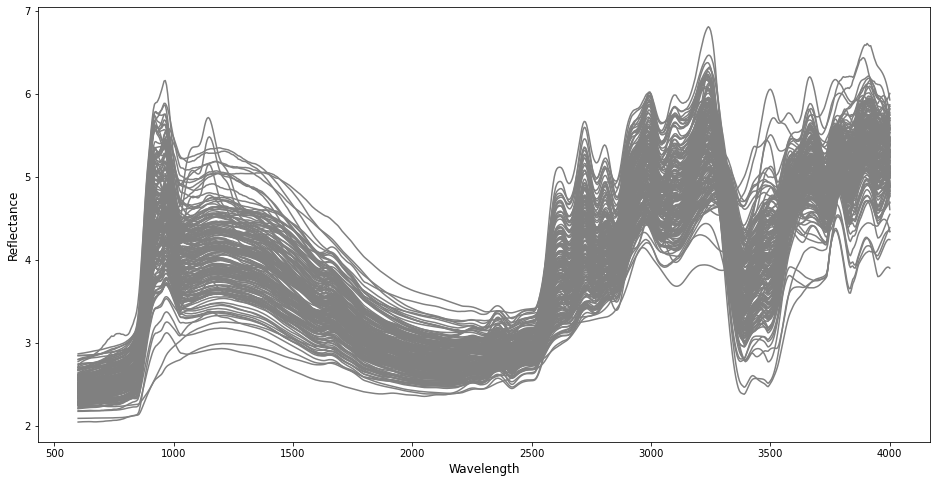

In [17]:
plt.figure(figsize = (16, 8))
for i in range(len(df_soil_neossolo_data)):
    
    test_row = df_soil_neossolo_data.iloc[i]
    plt.plot(index_col, test_row, markersize = 0.01, color='grey') 
    
plt.xlabel('Wavelength', fontsize=12)
plt.ylabel('Reflectance', fontsize=12)
plt.show()

In [18]:
# Standardizing
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ('std_scaler',StandardScaler())
])

In [19]:
X = pipeline.fit_transform(df_soil_neossolo_data)
df_soil_neossolo_data_tr = pd.DataFrame(X,columns=df_soil_neossolo_data.columns)
df_soil_neossolo_data_tr

,4000,3995,3990,3985,3980,3975,3970,3965,3960,3955,...,645,640,635,630,625,620,615,610,605,600
0,0.101236,0.090552,0.080169,0.070029,0.060074,0.050249,0.040501,0.030782,0.021049,0.011266,...,-0.032972,0.003388,0.028840,0.039581,0.030875,-0.003216,-0.069735,-0.175473,-0.322854,-0.502890
1,0.637916,0.618658,0.601553,0.586399,0.572978,0.561062,0.550425,0.540840,0.532087,0.523949,...,-0.378742,-0.426451,-0.473037,-0.516591,-0.554558,-0.583139,-0.596444,-0.585696,-0.539835,-0.450181
2,0.765671,0.777763,0.788511,0.798176,0.806965,0.815045,0.822551,0.829597,0.836277,0.842674,...,0.944480,0.980040,1.022572,1.071429,1.125455,1.182101,1.235823,1.275713,1.283728,1.238203
3,-1.609832,-1.607110,-1.605012,-1.603700,-1.603251,-1.603684,-1.604976,-1.607075,-1.609912,-1.613402,...,-0.875150,-0.852779,-0.838512,-0.834541,-0.843180,-0.866516,-0.905480,-0.957890,-1.015514,-1.062680
4,0.991982,1.059096,1.112665,1.154663,1.186904,1.211067,1.228728,1.241380,1.250458,1.257354,...,2.125147,2.131665,2.121623,2.088883,2.024803,1.916829,1.747152,1.493190,1.134343,0.669932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,0.023805,0.014727,0.008580,0.004971,0.003528,0.003895,0.005732,0.008707,0.012496,0.016777,...,-0.506280,-0.534093,-0.558707,-0.577294,-0.586178,-0.580269,-0.552405,-0.493202,-0.393022,-0.248248
176,-0.706408,-0.720471,-0.731140,-0.738927,-0.744280,-0.747597,-0.749238,-0.749537,-0.748809,-0.747357,...,0.415029,0.384937,0.356185,0.331213,0.312699,0.303618,0.307128,0.325964,0.360878,0.408340
177,2.295505,2.276357,2.258524,2.242007,2.226700,2.212419,2.198933,2.185980,2.173284,2.160561,...,0.460931,0.483130,0.502173,0.516761,0.525004,0.523990,0.509240,0.474364,0.412063,0.318235
178,0.986246,0.981524,0.979125,0.978802,0.980272,0.983225,0.987338,0.992275,0.997694,1.003246,...,0.593650,0.573480,0.573559,0.600565,0.662413,0.768153,0.926748,1.143120,1.409801,1.696963


In [20]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [19]:
scores = []
ne = [1,100,500,800,1000,2000]
for n in ne:
    forest_reg_neossolo = RandomForestRegressor(n_estimators=n)
    score = cross_val_score(forest_reg_neossolo,df_soil_neossolo_data_tr,df_soil_neossolo_target,cv=10)
    score = score.mean()
    scores.append(score)

D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\model_selection\_validation.py:593: DataCon

D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\model_selection\_validation.py:593: DataCon

D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\softwareForLearn\anaconda\inss\lib\site-packages\sklearn\model_selection\_validation.py:593: DataCon

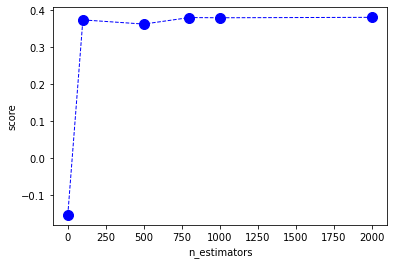

[-0.15502201019181322,
 0.3741568939093372,
 0.3628198040796829,
 0.38051589992520396,
 0.37994424492444523,
 0.38109170533569825]

In [20]:
plt.plot(ne,scores,'bo',linestyle = 'dashed', linewidth = 1, markersize = 10)
plt.xlabel('n_estimators')
plt.ylabel('score')
plt.show()
scores

In [21]:
forest_reg_neossolo = RandomForestRegressor(n_estimators=2000)
forest_reg_neossolo.fit(df_soil_neossolo_data_tr, df_soil_neossolo_target)

<ipython-input-21-8c2939348785>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_reg_neossolo.fit(df_soil_neossolo_data_tr, df_soil_neossolo_target)


RandomForestRegressor(n_estimators=2000)

In [22]:
import joblib
from sklearn.metrics import r2_score

In [21]:
es = joblib.load('./model/neossolo/forest_reg_neossolo.pkl')

In [25]:
Y = es.predict(df_soil_test_neossolo_data_tr)
m = mean_squared_error(df_soil_test_neossolo_target, Y)
print("root_mean_squared_error: "+str(np.sqrt(m)))
print("R2: "+str(r2_score(df_soil_test_neossolo_target, Y)))

root_mean_squared_error: 7.666249724551702
R2: -0.14484227991381804


D:\softwareForLearn\anaconda\inss\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


<AxesSubplot:>

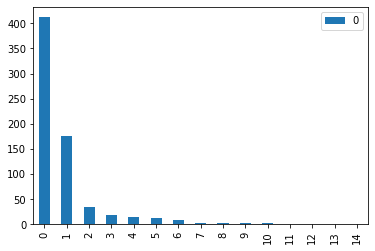

In [47]:
#PCA
df_soil_neossolo_data_tr_ = df_soil_neossolo_data_tr
ew_neossolo, ev_neossolo = np.linalg.eig(np.cov(df_soil_neossolo_data_tr_.T))
ew_neossolo_order = np.argsort(ew_neossolo)[::-1]
ew_neossolo_sort = ew_neossolo[ew_neossolo_order]
ev_neossolo_sort = ev_neossolo[:,ew_neossolo_order]
pd.DataFrame(ew_neossolo_sort[0:15]).plot(kind='bar')

In [48]:
from sklearn.decomposition import PCA
from sklearn import linear_model

In [71]:
pca_neossolo = PCA(n_components=2)
pca_neossolo.fit(df_soil_neossolo_data_tr)
df_soil_neossolo_data_tr_pca = pca_neossolo.transform(df_soil_neossolo_data_tr)

ols_neossolo = linear_model.LinearRegression()
ols_neossolo.fit(df_soil_neossolo_data_tr_pca, df_soil_neossolo_target)

LinearRegression()

In [72]:
df_soil_test_neossolo_data_tr_pca = pca_neossolo.transform(df_soil_test_neossolo_data_tr)
Y = ols_neossolo.predict(df_soil_test_neossolo_data_tr_pca)
m = mean_squared_error(df_soil_test_neossolo_target, Y)
print("root_mean_squared_error: "+str(np.sqrt(m)))
print("R2: "+str(r2_score(df_soil_test_neossolo_target, Y)))

root_mean_squared_error: 6.368740314775781
R2: 0.209891348035802


In [73]:
joblib.dump(ols_neossolo, './model/neossolo/ols_neossolo.pkl')

['./model/neossolo/ols_neossolo.pkl']

In [74]:
joblib.dump(pca_neossolo, './model/neossolo/pca_neossolo.pkl')

['./model/neossolo/pca_neossolo.pkl']

In [75]:
#PLSR
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import GridSearchCV

In [82]:
pls_model_neossolo_setup = PLSRegression(scale=True)
param_grid = {'n_components': range(1,2)}
gsearch = GridSearchCV(pls_model_neossolo_setup, param_grid)
pls_model_neossolo = gsearch.fit(df_soil_neossolo_data_tr, df_soil_neossolo_target)

In [83]:
Y = pls_model_neossolo.predict(df_soil_test_neossolo_data_tr)
m = mean_squared_error(df_soil_test_neossolo_target, Y)
print("root_mean_squared_error: "+str(np.sqrt(m)))
print("R2: "+str(r2_score(df_soil_test_neossolo_target, Y)))

root_mean_squared_error: 6.329017659702298
R2: 0.21971663061705649


In [84]:
joblib.dump(pls_model_neossolo, './model/neossolo/pls_model_neossolo.pkl')

['./model/neossolo/pls_model_neossolo.pkl']

In [25]:
es_t = joblib.load('./model/argissolo/ols_argissolo.pkl')

In [26]:
pca_t = joblib.load('./model/argissolo/pca_argissolo.pkl')

In [27]:
df_soil_test_neossolo_data_tr_p = pca_t.transform(df_soil_test_neossolo_data_tr)

In [28]:
Y = es_t.predict(df_soil_test_neossolo_data_tr_p)
m = mean_squared_error(df_soil_test_neossolo_target, Y)
print("root_mean_squared_error: "+str(np.sqrt(m)))
print("R2: "+str(r2_score(df_soil_test_neossolo_target, Y)))

root_mean_squared_error: 10.53300993049031
R2: -1.1611490632297192
